In [1]:
dir_cat = '../gz2.csv'

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(dir_cat)

In [4]:
# Display the first few rows of the DataFrame
print(f"Table shape: {df.shape[0]} rows, {df.shape[1]} columns.")
df.head()

Table shape: 239695 rows, 232 columns.


ra        dec     rastring    decstring  sample_x gz2_class  \
0  179.042984  60.522518  11:56:10.32  +60:31:21.1  original      Sc+t   
1  135.084396  52.494240  09:00:20.26  +52:29:39.3  original      Sb+t   
2  183.371979  50.741508  12:13:29.27  +50:44:29.4  original        Ei   
3  186.251953  28.558598  12:25:00.47  +28:33:31.0  original      Sc+t   
4  161.086395  14.084465  10:44:20.73  +14:05:04.1  original        Er   

   total_classifications  total_votes  \
0                     45          342   
1                     42          332   
2                     36          125   
3                     28          218   
4                     43          151   

   t01_smooth_or_features_a01_smooth_count  \
0                                        0   
1                                        1   
2                                       28   
3                                        1   
4                                       33   

   t01_smooth_or_features_a01_smooth_weight  ...  \
0                                       0.0  ...   
1                                       1.0  ...   
2                                      28.0  ...   
3                                       1.0  ...   
4                                      33.0  ...   

   t11_arms_number_a36_more_than_4_debiased  \
0                                  0.482646   
1                                  0.504833   
2                                  0.000000   
3                                  0.241322   
4                                  0.000000   

   t11_arms_number_a36_more_than_4_flag  t11_arms_number_a37_cant_tell_count  \
0                                     0                                   16   
1                                     0                                   13   
2                                     0                                    0   
3                                     0                                    6   
4                                     0                                    0   

   t11_arms_number_a37_cant_tell_weight  \
0                                  16.0   
1                                  13.0   
2                                   0.0   
3                                   6.0   
4                                   0.0   

   t11_arms_number_a37_cant_tell_fraction  \
0                                   0.400   
1                                   0.317   
2                                   0.000   
3                                   0.240   
4                                   0.000   

   t11_arms_number_a37_cant_tell_weighted_fraction  \
0                                            0.400   
1                                            0.323   
2                                            0.000   
3                                            0.240   
4                                            0.000   

   t11_arms_number_a37_cant_tell_debiased  t11_arms_number_a37_cant_tell_flag  \
0                                0.394506                                   0   
1                                0.322743                                   0   
2                                0.000000                                   0   
3                                0.239765                                   0   
4                                0.000000                                   0   

   sample_y  galaxyID  
0  original     58957  
1  original    193641  
2  original     55934  
3  original    158501  
4  original    110939  

[5 rows x 232 columns]

In [5]:
# function to display gz2_class labels
def display_gz2_class(gz2_class_column):
    print(f'There are {len(set(gz2_class_column))} unique gz2_class labels.\n')
    for i, item in enumerate(set(gz2_class_column), 1):
        print(item, end=' ')
        if i%15==0:
            print('\n') 

In [6]:
display_gz2_class(df.gz2_class)

There are 818 unique gz2_class labels.

SBc?t(u) Sd2t Sd1m(r) SBc1l(l) Sb2l(d) Sc4l(m) Sc1m(l) SBc4l Er(r) A SBb+t(d) Sd?m(m) SBc?m(i) Sd4m Sa2l(m) 

SBc+t(d) SBc Sa3l(i) Sb?t(d) SBb1l(i) SBa2t SBb+m(m) SBc4m(i) Sc4t(o) Sb3l(d) Sb Sc2l Sen Sa?l(r) SBc3t(i) 

Sa1m(d) Sa2m SBb+m(o) SBc3m(o) Sc?l(i) SBd2t(i) Sd2t(m) SBc?t(o) Sb3m(u) SBc1t(u) Sc4m(d) Sb2t(o) SBc2m SBc2l(u) Sd2m(r) 

Sc2t(u) Sd1t(m) Sc2m(d) Sc4t(r) Ec(l) SBb+t(i) Sc1t SBb3t(o) SBd1m(i) SBd2l(m) SBb3t(m) Sb?l(r) Sc2t(l) SBb4t(m) SBc1t(m) 

Ei(u) SBb1t(m) Sc+t(i) SBc2l SBa+m SBb+l(i) Sa4t SBc?m(m) Sc3t(i) Sc?t(o) Sb4l(m) SBc?l(r) Sa(l) SBb(i) SBb1l(d) 

Sd3l SBa2m(r) SBd1l(d) Sc+l SBc?l Sd(m) Sc3l(d) Sd?m Ei(l) Sd?t Sc2t(d) SBb?m(i) Sc(m) Sen(i) Sb+m(r) 

Sc+l(i) Sa1l(d) Sb?t(o) SBb1l SBb1t(d) SBa2l(r) Sb(d) Sb1m Sd?l(i) SBa2m SBb+t SBc+t(r) Sa2t Sb+t(d) SBa2t(r) 

SBb?t(d) SBc3l(r) SBb4t(d) SBb?m(r) Sc?l(l) SBb1t(o) SBb4m(i) SBd2l(d) SBc1t(i) SBa2t(l) Sd2t(i) Sc4l(i) Sc(l) SBb4t(r) Sd?m(r) 

Sc?m Ec(d) SBc4m(r) Sb1l(l) SBd1m

#### ------------ Classification Thresholds ------------
We classify the galaxies into 8 classes: round elliptical, in-between elliptical, cigar-shaped elliptical, edge-on, barred spiral, unbarred spiral, irregular, merger.

Threshold: following Table3 of [Willett+13](https://arxiv.org/pdf/1308.3496v2.pdf) or Table2 of [Kalvankar+20](https://arxiv.org/abs/2008.13611).

<!--  -->

### Smooth Elliptical
#### class0 -- round elliptical (Er)

In [7]:
df.loc[( (df.t01_1>=0.469) & (df.t07_1>=0.5) & (df.t06_2 >= 0.5) ), 'label1'] = 0

In [8]:
df_class0 = df[df.label1==0].copy()
df_class0

ra        dec     rastring    decstring  sample_x gz2_class  \
4       161.086395  14.084465  10:44:20.73  +14:05:04.1  original        Er   
10      152.301804  15.005116  10:09:12.43  +15:00:18.4  original        Er   
12      224.865158  16.645098  14:59:27.64  +16:38:42.4  original        Er   
13      175.636871  26.488888  11:42:32.85  +26:29:20.0  original        Er   
18      209.473053  64.910980  13:57:53.53  +64:54:39.5  original        Er   
...            ...        ...          ...          ...       ...       ...   
239655  344.763336  -0.329441  22:59:03.20  +00:19:46.0  stripe82        Er   
239660   46.604069  -0.551216  03:06:24.98  +00:33:04.4  stripe82        Er   
239674  178.179733  29.317156  11:52:43.14  +29:19:01.8  original        Er   
239684  167.420471  18.718920  11:09:40.91  +18:43:08.1  original        Er   
239686  220.151138   3.538694  14:40:36.27  +03:32:19.3  original        Er   

        total_classifications  total_votes  \
4                          43          151   
10                         51          191   
12                         35          119   
13                         49          166   
18                         35          102   
...                       ...          ...   
239655                     42          144   
239660                     41          130   
239674                     42          134   
239684                     49          196   
239686                     42          150   

        t01_smooth_or_features_a01_smooth_count  \
4                                            33   
10                                           38   
12                                           31   
13                                           45   
18                                           26   
...                                         ...   
239655                                       32   
239660                                       34   
239674                                       38   
239684                                       33   
239686                                       33   

        t01_smooth_or_features_a01_smooth_weight  ...  \
4                                      33.000000  ...   
10                                     37.342999  ...   
12                                     31.000000  ...   
13                                     45.000000  ...   
18                                     26.000000  ...   
...                                          ...  ...   
239655                                 31.150000  ...   
239660                                 34.000000  ...   
239674                                 38.000000  ...   
239684                                 33.000000  ...   
239686                                 33.000000  ...   

        t11_arms_number_a36_more_than_4_flag  \
4                                          0   
10                                         0   
12                                         0   
13                                         0   
18                                         0   
...                                      ...   
239655                                     0   
239660                                     0   
239674                                     0   
239684                                     0   
239686                                     0   

        t11_arms_number_a37_cant_tell_count  \
4                                         0   
10                                        0   
12                                        0   
13                                        0   
18                                        0   
...                                     ...   
239655                                    1   
239660                                    0   
239674                                    0   
239684                                    1   
239686                                    0   

        t11_arms_number_a37_cant_tell_weight  \
4                         

In [9]:
# check how many unique class labels are in the gz2_class column
display_gz2_class(df_class0.gz2_class)

There are 446 unique gz2_class labels.

SBc?t(u) Sd2t Sb2l(d) SBc4l Er(r) A SBb+t(d) Sd4m SBc?m(i) SBc+t(d) SBc Sb?t(d) SBa2t Sb3l(d) Sb 

Sc2l SBc3t(i) Sa2m Sc?l(i) SBc?t(o) Sb2t(o) SBc2m Sc4t(r) Sc2m(d) Sc1t SBb3t(o) Sb?l(r) Sc2t(l) Sc+t(i) SBb1t(m) 

SBc2l Sc3t(i) Sc?t(o) Sa(l) SBb(i) Sd3l Sc+l SBc?l Sd?m Sd?t Sc(m) Sb+m(r) Sb?t(o) SBb1l Sb(d) 

Sb1m Sd?l(i) SBa2m SBb+t SBc+t(r) Sa2t SBb?t(d) SBb?m(r) Sc?l(l) SBb1t(o) SBc1t(i) Sc(l) SBb4t(r) Sd?m(r) Sc?m 

Sb1l(l) SBd1m Sa1m Sc+t(r) SBc1t(d) SBb3l Sc2m(r) Sc3m(r) SBb+t(m) Sb(m) Sc3m(d) Sb2l(i) SBc?m(d) Sd(i) SBb+m 

Sb4m(o) SBc(r) Sb?t(l) SBd3t SBc1l(m) Sa1t(o) Sd2l Ei(o) Sc3m Sd(d) Sb?m Sc(i) Sb2t(i) Sc1m SBb3m 

Sc3m(o) SBb4t(o) Er(m) SBb+t(r) SBc?m(r) SBb2m(u) Sc2l(m) Sc+t(l) SBc4t(m) Sc1t(o) Sc(o) Sb1l(m) SBb4l Sc+t Ei(d) 

SBc(m) SBc1l SBc1t(r) Sc(r) Sb1t(l) SBb1m SBc3t(r) SBc1m(r) Sa Sb+t Sc3t SBa1m SBb+t(o) Sd?t(i) Sc?m(o) 

Sb?t(r) SBb2m(l) Sb4l SBc4m SBb SBd?t(o) SBb2t(u) Sa4l SBc2t(d) SBa2l(m) Sc1l Sd3l(i) SBa SBd?t SBc4t(

### class1 -- in-between elliptical (Ei)

In [10]:
df.loc[( (df.t01_1>=0.469) & (df.t07_2>=0.5) & (df.t06_2 >= 0.5) ), 'label1'] = 1

In [11]:
df_class1 = df[df.label1==1].copy()
df_class1

ra        dec     rastring    decstring  sample_x gz2_class  \
2       183.371979  50.741508  12:13:29.27  +50:44:29.4  original        Ei   
5       246.921387  40.926968  16:27:41.13  +40:55:37.1     extra        Ei   
6       249.474640  36.073040  16:37:53.91  +36:04:22.9  original        Ei   
8       195.278030  39.841473  13:01:06.73  +39:50:29.3  original        Ei   
11      119.617126  37.786617  07:58:28.11  +37:47:11.8  original        Ei   
...            ...        ...          ...          ...       ...       ...   
239673  142.053253  37.672295  09:28:12.78  +37:40:20.3     extra        Ei   
239677  123.369202  27.326279  08:13:28.61  +27:19:34.6  original        Ei   
239682  226.073853  48.919765  15:04:17.72  +48:55:11.2  original        Ei   
239687  118.103683  23.507954  07:52:24.88  +23:30:28.6  original        Ei   
239692   21.690212  -0.546427  01:26:45.65  +00:32:47.1  stripe82        Ei   

        total_classifications  total_votes  \
2                          36          125   
5                          48          154   
6                          39          142   
8                          50          158   
11                         42          139   
...                       ...          ...   
239673                     34          112   
239677                     45          155   
239682                     43          156   
239687                     40          113   
239692                     48          164   

        t01_smooth_or_features_a01_smooth_count  \
2                                            28   
5                                            41   
6                                            25   
8                                            42   
11                                           39   
...                                         ...   
239673                                       27   
239677                                       38   
239682                                       32   
239687                                       32   
239692                                       36   

        t01_smooth_or_features_a01_smooth_weight  ...  \
2                                      28.000000  ...   
5                                      41.000000  ...   
6                                      25.000000  ...   
8                                      42.000000  ...   
11                                     39.000000  ...   
...                                          ...  ...   
239673                                 27.000000  ...   
239677                                 38.000000  ...   
239682                                 32.000000  ...   
239687                                 32.000000  ...   
239692                                 35.366001  ...   

        t11_arms_number_a36_more_than_4_flag  \
2                                          0   
5                                          0   
6                                          0   
8                                          0   
11                                         0   
...                                      ...   
239673                                     0   
239677                                     0   
239682                                     0   
239687                                     0   
239692                                     0   

        t11_arms_number_a37_cant_tell_count  \
2                                         0   
5                                         0   
6                                         0   
8                                         0   
11                                        0   
...                                     ...   
239673                                    0   
239677                                    0   
239682                                    1   
239687                                    0   
239692                                    2   

        t11_arms_number_a37_cant_tell_weight  \
2                         

In [12]:
# check how many unique class1 labels are in the gz2_class column
display_gz2_class(df_class1.gz2_class)

There are 552 unique gz2_class labels.

SBc?t(u) Sd2t SBc1l(l) Sb2l(d) Sc1m(l) SBc4l A Er(r) SBb+t(d) Sd4m SBc?m(i) Sa2l(m) SBc+t(d) SBc SBb1l(i) 

SBa2t Sb?t(d) Sc4t(o) Sb3l(d) Sb Sc2l Sen SBc3t(i) Sa2m SBc3m(o) Sc?l(i) SBd2t(i) SBc?t(o) Sb3m(u) Sc4m(d) 

Sb2t(o) SBc2m Sc2t(u) Sc2m(d) Sc4t(r) Ec(l) SBb+t(i) Sc1t SBb3t(o) Sb?l(r) Sc2t(l) SBc1t(m) Ei(u) Sc+t(i) SBa+m 

SBc2l Sa4t SBc?m(m) Sc3t(i) Sc?t(o) SBc?l(r) SBb(i) SBb1l(d) Sc+l SBc?l Sd(m) Sd?m Sd?t Ei(l) SBb?m(i) 

Sc2t(d) Sc(m) Sb+m(r) Sc+l(i) Sb?t(o) SBb1l SBb1t(d) Sb(d) Sb1m Sd?l(i) SBa2m SBb+t SBc+t(r) Sa2t Sb+t(d) 

SBb?t(d) SBc3l(r) SBb?m(r) Sc?l(l) SBb4m(i) SBc1t(i) Sd2t(i) Sc(l) SBb4t(r) Sd?m(r) Sc?m Ec(d) SBc4m(r) Sb1l(l) SBd1m 

SBc1m(i) Sa1m Sc+t(r) SBc1t(d) SBb3l Sc2m(r) Sc3m(r) Sb(m) Sc3m(d) Sb2l(i) Sc2m(l) SBc?m(d) Sd(i) SBb2l(l) SBb+m 

SBc(r) Sb?t(l) SBd3t Sa1t(o) Sb?l(m) Sd2l Ei(o) Sc3m Sd(d) Sb?m Sc(i) Sb2t(i) SBc3l(i) Sc1m SBb3m 

Sc3m(o) SBb4t(l) Er(m) SBc1m(m) SBb+t(r) SBc?m(r) SBb?l(u) SBb2m(u) SBc1l(i) Sc2l

### Class2- cigar-shaped elliptical(Ec)

In [13]:

df.loc[( (df.t01_1>=0.469) & (df.t07_3>=0.5) & (df.t06_2 >= 0.5) ), 'label1'] = 2

In [14]:
df_class2 = df[df.label1==2].copy()
df_class2

ra        dec     rastring    decstring  sample_x gz2_class  \
58      240.400726  12.360189  16:01:36.17  +12:21:36.7  original        Ec   
82      243.740982  21.938412  16:14:57.84  +21:56:18.3  original        Ec   
216     250.405685  40.163506  16:41:37.36  +40:09:48.6  original        Ec   
292     186.354630  16.124180  12:25:25.11  +16:07:27.0  original        Ec   
324     165.657318  59.125290  11:02:37.76  +59:07:31.0  original        Ec   
...            ...        ...          ...          ...       ...       ...   
239685  149.925385  20.729364  09:59:42.09  +20:43:45.7     extra        Ec   
239688  173.478195  28.623381  11:33:54.77  +28:37:24.2  original        Ec   
239689  125.736557  21.344851  08:22:56.77  +21:20:41.5     extra        Ec   
239690  167.542648  28.991867  11:10:10.23  +28:59:30.7     extra        Ec   
239694   48.130630  -1.112244  03:12:31.35  -01:06:44.1  stripe82        Ec   

        total_classifications  total_votes  \
58                         49          176   
82                         34          125   
216                        44          151   
292                        39          153   
324                        47          178   
...                       ...          ...   
239685                     42          144   
239688                     42          133   
239689                     43          166   
239690                     42          135   
239694                     49          170   

        t01_smooth_or_features_a01_smooth_count  \
58                                           24   
82                                           21   
216                                          32   
292                                          22   
324                                          34   
...                                         ...   
239685                                       25   
239688                                       36   
239689                                       28   
239690                                       34   
239694                                       36   

        t01_smooth_or_features_a01_smooth_weight  ...  \
58                                     24.000000  ...   
82                                     21.000000  ...   
216                                    32.000000  ...   
292                                    22.000000  ...   
324                                    34.000000  ...   
...                                          ...  ...   
239685                                 25.000000  ...   
239688                                 36.000000  ...   
239689                                 27.325001  ...   
239690                                 33.134998  ...   
239694                                 36.000000  ...   

        t11_arms_number_a36_more_than_4_flag  \
58                                         0   
82                                         0   
216                                        0   
292                                        0   
324                                        0   
...                                      ...   
239685                                     0   
239688                                     0   
239689                                     0   
239690                                     0   
239694                                     0   

        t11_arms_number_a37_cant_tell_count  \
58                                        0   
82                                        0   
216                                       0   
292                                       0   
324                                       0   
...                                     ...   
239685                                    0   
239688                                    0   
239689                                    0   
239690                                    0   
239694                                    0   

        t11_arms_number_a37_cant_tell_weight  \
58                        

## Spiral
### Class3 - edgo-on (Se)

In [15]:
df.loc[( (df.t01_2>=0.430) & (df.t02_1>=0.602) & (df.t06_2>=0.5) ), 'label1'] = 3

In [16]:
df_class3 = df[df.label1==3].copy()
df_class3

ra        dec     rastring    decstring  sample_x gz2_class  \
58      240.400726  12.360189  16:01:36.17  +12:21:36.7  original        Ec   
97      206.412247  56.616508  13:45:38.94  +56:36:59.4  original       Ser   
176     243.569687  17.757439  16:14:16.72  +17:45:26.8  original       Ser   
224     197.148468  33.975834  13:08:35.63  +33:58:33.0  original       Ser   
235     225.568130  11.917587  15:02:16.35  +11:55:03.3  original       Ser   
...            ...        ...          ...          ...       ...       ...   
239610  124.305573  38.012562  08:17:13.34  +38:00:45.2  original        Ec   
239611  169.989822  30.576523  11:19:57.56  +30:34:35.5  original       Sen   
239636  183.217789  48.305874  12:12:52.27  +48:18:21.1     extra        Ec   
239647  204.915375  16.408674  13:39:39.69  +16:24:31.2     extra       Sen   
239672  135.925339  12.250283  09:03:42.08  +12:15:01.0  original       Ser   

        total_classifications  total_votes  \
58                         49          176   
97                         44          165   
176                        48          228   
224                        30          116   
235                        46          195   
...                       ...          ...   
239610                     49          169   
239611                     39          150   
239636                     36          123   
239647                     40          150   
239672                     54          187   

        t01_smooth_or_features_a01_smooth_count  \
58                                           24   
97                                            3   
176                                           8   
224                                           8   
235                                           1   
...                                         ...   
239610                                       26   
239611                                       11   
239636                                       18   
239647                                       17   
239672                                       26   

        t01_smooth_or_features_a01_smooth_weight  ...  \
58                                     24.000000  ...   
97                                      3.000000  ...   
176                                     7.011000  ...   
224                                     8.000000  ...   
235                                     1.000000  ...   
...                                          ...  ...   
239610                                 25.500000  ...   
239611                                 10.818000  ...   
239636                                 17.707001  ...   
239647                                 17.000000  ...   
239672                                 24.900000  ...   

        t11_arms_number_a36_more_than_4_flag  \
58                                         0   
97                                         0   
176                                        0   
224                                        0   
235                                        0   
...                                      ...   
239610                                     0   
239611                                     0   
239636                                     0   
239647                                     0   
239672                                     0   

        t11_arms_number_a37_cant_tell_count  \
58                                        0   
97                                        0   
176                                       0   
224                                       0   
235                                       0   
...                                     ...   
239610                                    0   
239611                                    0   
239636                                    0   
239647                                    0   
239672                                    0   

        t11_arms_number_a37_cant_tell_weight  \
58                        

### Class4 -- Barred spirals

In [17]:
df.loc[( (df.t01_2>=0.430) & (df.t02_2>=0.715) & (df.t03_1>=0.715) & (df.t04_1>=0.619) ), 'label1'] = 4

In [18]:
df_class4 = df[df.label1==4].copy()
df_class4

ra        dec     rastring    decstring  sample_x gz2_class  \
34      243.513702  14.282114  16:14:03.29  +14:16:55.6  original     SBb2m   
38      245.818939  39.919876  16:23:16.55  +39:55:11.6  original     SBc3m   
90      166.881683   0.783104  11:07:31.60  +00:46:59.2  original     SBb+t   
116     218.940582  24.725796  14:35:45.74  +24:43:32.9  original     SBc2m   
162     220.799255  18.879953  14:43:11.82  +18:52:47.8  original     SBb4t   
...            ...        ...          ...          ...       ...       ...   
238516  177.742188  22.077009  11:50:58.12  +22:04:37.2     extra     SBd2l   
238582  198.660995   9.147294  13:14:38.64  +09:08:50.3  original     SBb2l   
239373  141.623199  31.966730  09:26:29.57  +31:58:00.2     extra     SBd2l   
239457  191.397659  22.057150  12:45:35.44  +22:03:25.7  original     SBc2l   
239469  137.792725  18.740213  09:11:10.25  +18:44:24.8  original     SBb2l   

        total_classifications  total_votes  \
34                         39          300   
38                         45          364   
90                         43          340   
116                        47          377   
162                        43          331   
...                       ...          ...   
238516                     29          191   
238582                     28          161   
239373                     32          235   
239457                     39          291   
239469                     62          382   

        t01_smooth_or_features_a01_smooth_count  \
34                                            0   
38                                            0   
90                                            0   
116                                           0   
162                                           0   
...                                         ...   
238516                                        6   
238582                                       10   
239373                                        4   
239457                                        3   
239469                                        9   

        t01_smooth_or_features_a01_smooth_weight  ...  \
34                                           0.0  ...   
38                                           0.0  ...   
90                                           0.0  ...   
116                                          0.0  ...   
162                                          0.0  ...   
...                                          ...  ...   
238516                                       6.0  ...   
238582                                      10.0  ...   
239373                                       4.0  ...   
239457                                       3.0  ...   
239469                                       9.0  ...   

        t11_arms_number_a36_more_than_4_flag  \
34                                         0   
38                                         0   
90                                         0   
116                                        0   
162                                        0   
...                                      ...   
238516                                     0   
238582                                     0   
239373                                     0   
239457                                     0   
239469                                     0   

        t11_arms_number_a37_cant_tell_count  \
34                                        0   
38                                        2   
90                                        5   
116                                       0   
162                                       4   
...                                     ...   
238516                                    0   
238582                                    0   
239373                                    0   
239457                                    0   
239469                                    0   

        t11_arms_number_a37_cant_tell_weight  \
34                        

### Class5 -- Unbarred spirals

In [19]:
df.loc[( (df.t01_2>=0.430) & (df.t02_2>=0.715) & (df.t03_2>=0.715) & (df.t04_1>=0.619) ), 'label1'] = 5

In [20]:
df_class5 = df[df.label1==5].copy()
df_class5

ra        dec     rastring    decstring  sample_x gz2_class  \
0       179.042984  60.522518  11:56:10.32  +60:31:21.1  original      Sc+t   
1       135.084396  52.494240  09:00:20.26  +52:29:39.3  original      Sb+t   
3       186.251953  28.558598  12:25:00.47  +28:33:31.0  original      Sc+t   
7       243.146759  29.365067  16:12:35.22  +29:21:54.2  original      Sb+t   
9       183.062057  56.177532  12:12:14.89  +56:10:39.1  original      Sb?t   
...            ...        ...          ...          ...       ...       ...   
239529  234.169739  16.848238  15:36:40.74  +16:50:53.7     extra      Sc2l   
239587  133.435791  26.996670  08:53:44.59  +26:59:48.0     extra      Sc?m   
239588  214.727646  13.814504  14:18:54.64  +13:48:52.2     extra      Sc?m   
239591  172.581680  44.169930  11:30:19.60  +44:10:11.7     extra   Sc2m(m)   
239630  169.506104  30.844784  11:18:01.46  +30:50:41.2  original      Sc2l   

        total_classifications  total_votes  \
0                          45          342   
1                          42          332   
3                          28          218   
7                          35          282   
9                          43          275   
...                       ...          ...   
239529                     38          281   
239587                     34          208   
239588                     30          176   
239591                     39          263   
239630                     40          251   

        t01_smooth_or_features_a01_smooth_count  \
0                                             0   
1                                             1   
3                                             1   
7                                             0   
9                                             8   
...                                         ...   
239529                                        7   
239587                                       11   
239588                                       12   
239591                                        8   
239630                                       13   

        t01_smooth_or_features_a01_smooth_weight  ...  \
0                                          0.000  ...   
1                                          1.000  ...   
3                                          1.000  ...   
7                                          0.000  ...   
9                                          8.000  ...   
...                                          ...  ...   
239529                                     7.000  ...   
239587                                    10.035  ...   
239588                                    11.192  ...   
239591                                     8.000  ...   
239630                                    13.000  ...   

        t11_arms_number_a36_more_than_4_flag  \
0                                          0   
1                                          0   
3                                          0   
7                                          0   
9                                          0   
...                                      ...   
239529                                     0   
239587                                     0   
239588                                     0   
239591                                     0   
239630                                     0   

        t11_arms_number_a37_cant_tell_count  \
0                                        16   
1                                        13   
3                                         6   
7                                         8   
9                                         9   
...                                     ...   
239529                                    1   
239587                                    9   
239588                                    6   
239591                                    0   
239630                                    2   

        t11_arms_number_a37_cant_tell_weight  \
0                         

### Class6 -- Irregular (without merger)

In [21]:
df.loc[( (df.t06_1>=0.420) & ((df.t08_3>=0.5)|(df.t08_4>=0.5)|(df.t08_5>=0.5)|(df.t08_7>=0.5)) ), 'label1'] = 6

In [22]:
df_class6 = df[df.label1==6].copy()
df_class6[['gz2_class','t06_1','t08_3', 't08_4', 't08_5', 't08_6', 't08_7']]

gz2_class  t06_1  t08_3  t08_4  t08_5  t08_6  t08_7
78            Er  0.452  0.000  0.071  0.500  0.286    0.0
106        Er(o)  0.781  0.040  0.000  0.600  0.360    0.0
188      Sb?t(i)  0.467  0.143  0.571  0.143  0.000    0.0
266         Sb1m  0.468  0.500  0.409  0.091  0.000    0.0
340           Ei  0.455  0.600  0.050  0.100  0.000    0.0
...          ...    ...    ...    ...    ...    ...    ...
239639     Sd(i)  0.781  0.040  0.760  0.200  0.000    0.0
239659     Ei(i)  0.634  0.080  0.680  0.240  0.000    0.0
239678     Ei(i)  0.514  0.105  0.789  0.105  0.000    0.0
239681     Sd(i)  0.634  0.231  0.692  0.000  0.000    0.0
239691     Ei(i)  0.811  0.000  0.633  0.267  0.100    0.0

[9903 rows x 7 columns]

### Class7 -- merger

In [23]:
df.loc[( (df.t06_1>=0.420) & (df.t08_6>=0.5) ), 'label1'] = 7

In [24]:
df_class7 = df[df.label1==7].copy()
df_class7[['gz2_class','t06_1','t08_3', 't08_4', 't08_5', 't08_6', 't08_7']]

gz2_class  t06_1  t08_3  t08_4  t08_5  t08_6  t08_7
124        Ei(m)  0.519  0.000  0.000  0.357  0.643  0.000
191      Sb2l(m)  0.884  0.000  0.000  0.079  0.895  0.000
202        Ei(m)  0.524  0.045  0.000  0.364  0.545  0.000
204      Sc4m(m)  0.660  0.030  0.000  0.212  0.727  0.000
249      Sb1m(m)  0.778  0.086  0.086  0.257  0.514  0.000
...          ...    ...    ...    ...    ...    ...    ...
238352     Ei(m)  0.512  0.000  0.045  0.227  0.591  0.000
238453     Sd(m)  0.968  0.000  0.033  0.100  0.867  0.000
238493     Er(m)  0.636  0.000  0.000  0.286  0.714  0.000
238855     Sc(m)  0.784  0.103  0.138  0.172  0.517  0.034
239513     Ei(m)  0.659  0.074  0.000  0.333  0.593  0.000

[6064 rows x 7 columns]

#### Add label 2, 3, 4

In [25]:
df_class0.to_csv(dir_cat+'class0.csv', index=False)
df_class1.to_csv(dir_cat+'class1.csv', index=False)
df_class2.to_csv(dir_cat+'class2.csv', index=False)
df_class3.to_csv(dir_cat+'class3.csv', index=False)
df_class4.to_csv(dir_cat+'class4.csv', index=False)
df_class5.to_csv(dir_cat+'class5.csv', index=False)
df_class6.to_csv(dir_cat+'class6.csv', index=False)
df_class7.to_csv(dir_cat+'class7.csv', index=False)

In [26]:
# Combine all classes into one DataFrame
df_classAll = pd.concat([df_class0, df_class1, df_class2, df_class3, df_class4, df_class5, df_class6, df_class7])
df_classAll

ra        dec     rastring    decstring  sample_x gz2_class  \
4       161.086395  14.084465  10:44:20.73  +14:05:04.1  original        Er   
10      152.301804  15.005116  10:09:12.43  +15:00:18.4  original        Er   
12      224.865158  16.645098  14:59:27.64  +16:38:42.4  original        Er   
13      175.636871  26.488888  11:42:32.85  +26:29:20.0  original        Er   
18      209.473053  64.910980  13:57:53.53  +64:54:39.5  original        Er   
...            ...        ...          ...          ...       ...       ...   
238352  168.125656  31.384966  11:12:30.16  +31:23:05.9     extra     Ei(m)   
238453  210.678970  -1.198186  14:02:42.95  -01:11:53.5     extra     Sd(m)   
238493  160.422821  37.320293  10:41:41.48  +37:19:13.1  original     Er(m)   
238855  131.923615  25.888224  08:47:41.67  +25:53:17.6     extra     Sc(m)   
239513  197.589325   3.535229  13:10:21.44  +03:32:06.8  original     Ei(m)   

        total_classifications  total_votes  \
4                          43          151   
10                         51          191   
12                         35          119   
13                         49          166   
18                         35          102   
...                       ...          ...   
238352                     44          215   
238453                     34          184   
238493                     46          168   
238855                     38          225   
239513                     45          174   

        t01_smooth_or_features_a01_smooth_count  \
4                                            33   
10                                           38   
12                                           31   
13                                           45   
18                                           26   
...                                         ...   
238352                                       28   
238453                                       15   
238493                                       42   
238855                                       15   
239513                                       34   

        t01_smooth_or_features_a01_smooth_weight  ...  \
4                                      33.000000  ...   
10                                     37.342999  ...   
12                                     31.000000  ...   
13                                     45.000000  ...   
18                                     26.000000  ...   
...                                          ...  ...   
238352                                 28.000000  ...   
238453                                 14.707000  ...   
238493                                 42.000000  ...   
238855                                 15.000000  ...   
239513                                 34.000000  ...   

        t11_arms_number_a36_more_than_4_flag  \
4                                          0   
10                                         0   
12                                         0   
13                                         0   
18                                         0   
...                                      ...   
238352                                     0   
238453                                     0   
238493                                     0   
238855                                     0   
239513                                     0   

        t11_arms_number_a37_cant_tell_count  \
4                                         0   
10                                        0   
12                                        0   
13                                        0   
18                                        0   
...                                     ...   
238352                                    5   
238453                                    2   
238493                                    0   
238855                                    4   
239513                                    0   

        t11_arms_number_a37_cant_tell_weight  \
4                         

In [27]:
# galaxy counts for each class
df_classAll.groupby(['label1']).size()

label1
0.0    57603
1.0    84610
2.0    25497
3.0    10579
4.0     5258
5.0    23683
6.0     9903
7.0     6064
dtype: int64

In [28]:
# Create a new label2 column
df_classAll.loc[((df_classAll.label1==0)|(df_classAll.label1==1)|(df_classAll.label1==2)), 'label2'] = 0
df_classAll.loc[((df_classAll.label1==3)), 'label2'] = 1
df_classAll.loc[((df_classAll.label1==4)|(df_classAll.label1==5)), 'label2'] = 2
df_classAll.loc[((df_classAll.label1==6)), 'label2'] = 3
df_classAll.loc[((df_classAll.label1==7)), 'label2'] = 4
df_classAll.groupby(['label2']).size()

label2
0.0    167710
1.0     10579
2.0     28941
3.0      9903
4.0      6064
dtype: int64

In [29]:
# Create a new label3 column
df_classAll.loc[((df_classAll.label1==0)|(df_classAll.label1==1)|(df_classAll.label1==2)), 'label3'] = 0
df_classAll.loc[((df_classAll.label1==3)|(df_classAll.label1==4)|(df_classAll.label1==5)), 'label3'] = 1
df_classAll.loc[((df_classAll.label1==6)), 'label3'] = 2
df_classAll.loc[((df_classAll.label1==7)), 'label3'] = 3
df_classAll.groupby(['label3']).size()

label3
0.0    167710
1.0     39520
2.0      9903
3.0      6064
dtype: int64

In [30]:
# Create a new label4 column
df_classAll.loc[((df_classAll.label1==0)|(df_classAll.label1==1)|(df_classAll.label1==2)), 'label4'] = 0
df_classAll.loc[((df_classAll.label1==3)|(df_classAll.label1==4)|(df_classAll.label1==5)), 'label4'] = 1
df_classAll.loc[((df_classAll.label1==6)|(df_classAll.label1==7)), 'label4'] = 2
df_classAll.groupby(['label4']).size()

label4
0.0    167710
1.0     39520
2.0     15967
dtype: int64

In [31]:
for col in ['label1', 'label2', 'label3', 'label4']:
    df_classAll[col] = df_classAll[col].astype(int)
    
df_classAll.to_csv(dir_cat+'classAll_dirty.csv', index=False)

## Summary
After applying the above thresholds to (cleanly) classify galaxies info 8 morphology classes, available training galaxy sample size decrease from 239,695 to 223,197.

#### facts 
Ideally we hope every galaxy can be uniquely classified into a sigle class type.
But the above classification routine doesn't guarantee this. Some galaxies are classified into 2 or 3 or 4 different classes.

In [32]:
df_IDcount=df_classAll.groupby(['galaxyID']).galaxyID.agg('count').to_frame('count').reset_index()
df_IDcount

galaxyID  count
0              3      1
1              4      1
2              5      1
3              6      1
4              7      1
...          ...    ...
212974    295292      1
212975    295294      1
212976    295295      1
212977    295296      1
212978    295305      1

[212979 rows x 2 columns]

here above it doesn't show any of the assetID/galaxyID as more than one count but in reality there are some which are counted more than once

In [34]:
df_classAll[df_classAll.galaxyID==172941][['galaxyID','label1']]

galaxyID  label1
58    172941       2
58    172941       3

Here The asset_id=172941 galaxy is classified into class 3 and class 2 (cigar-shaped elliptical).

In [36]:
print(df_IDcount[df_IDcount['count']==2],
      df_IDcount[df_IDcount['count']==3],
      df_IDcount[df_IDcount['count']==4],
      df_IDcount[df_IDcount['count']==5])

        galaxyID  count
7             11      2
23            28      2
60            70      2
90           106      2
107          128      2
...          ...    ...
212911    295120      2
212944    295234      2
212948    295242      2
212967    295275      2
212971    295287      2

[9914 rows x 2 columns]         galaxyID  count
446          557      3
3925        5473      3
5601        8475      3
6208        9253      3
6843       10035      3
...          ...    ...
205903    275157      3
206062    275581      3
207845    280652      3
208181    281742      3
210409    287910      3

[152 rows x 2 columns] Empty DataFrame
Columns: [galaxyID, count]
Index: [] Empty DataFrame
Columns: [galaxyID, count]
Index: []


galaxies that are assigned with 2 and different classification types

__Exclude asset_id with multi-class assignment, we end up with a clean catalog of 202,913 samples.__

In [37]:
df_IDcount[df_IDcount['count']==1]

galaxyID  count
0              3      1
1              4      1
2              5      1
3              6      1
4              7      1
...          ...    ...
212974    295292      1
212975    295294      1
212976    295295      1
212977    295296      1
212978    295305      1

[202913 rows x 2 columns]

##### clean catalog

In [38]:
# select asset_id with unique count and save
unique_class_ID = df_IDcount[df_IDcount['count']==1].galaxyID.values
df_classAll_clean = df_classAll[df_classAll['galaxyID'].isin(unique_class_ID)]

In [39]:
df_classAll_clean[['galaxyID', 'label1', 'label2', 'label3', 'label4']].to_csv(dir_cat+'classAll_4label.csv', index=False)
df_classAll_clean[['galaxyID', 'label1', 'label2', 'label3', 'label4']]

galaxyID  label1  label2  label3  label4
4         110939       0       0       0       0
10        187749       0       0       0       0
12        162781       0       0       0       0
13        154143       0       0       0       0
18         12450       0       0       0       0
...          ...     ...     ...     ...     ...
238352    260790       7       4       3       2
238453    250189       7       4       3       2
238493    115591       7       4       3       2
238855    271627       7       4       3       2
239513     16705       7       4       3       2

[202913 rows x 5 columns]

### Gallery
Image data from GalxayZoo2

In [40]:
dir_image = '../data/raw/images'

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [42]:
# function to display images
def draw_galaxyID(n, df):
    if n==1:
        return df.sample(n=n, axis='rows').galaxyID.values[0]
    else:
        return df.sample(n=n, axis='rows').galaxyID.values

In [43]:
# function to plot images
def plot_samples(df):
    fig, axes = plt.subplots(2, 6, figsize=(10, 3))
    plt.subplots_adjust(hspace=0.001, wspace=0.001)
    for i, ax in enumerate(axes.flat):
        imgID = draw_galaxyID(1, df)
        IMG = plt.imread(dir_image+f'/{imgID}.jpg')
        ax.imshow(IMG)
        
        ax.text(0.96, 0.01, f'{imgID}',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='white')
        
        ax.axis('off')

    #plt.tight_layout()

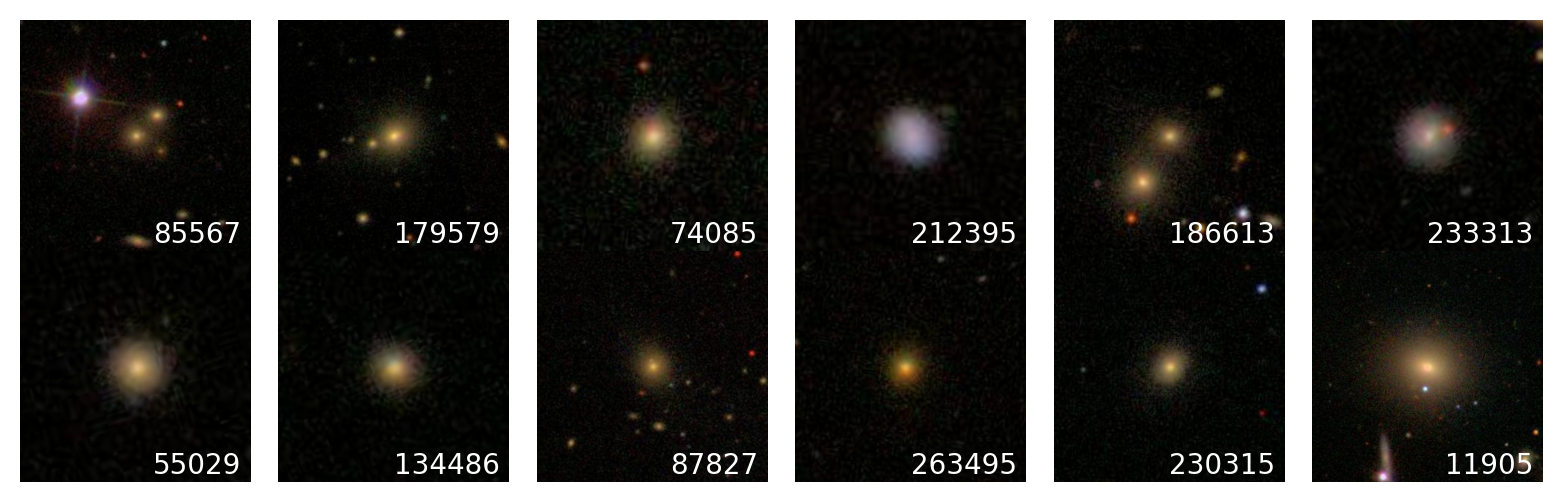

In [44]:
plot_samples(df_class0) # smooth round elliptical

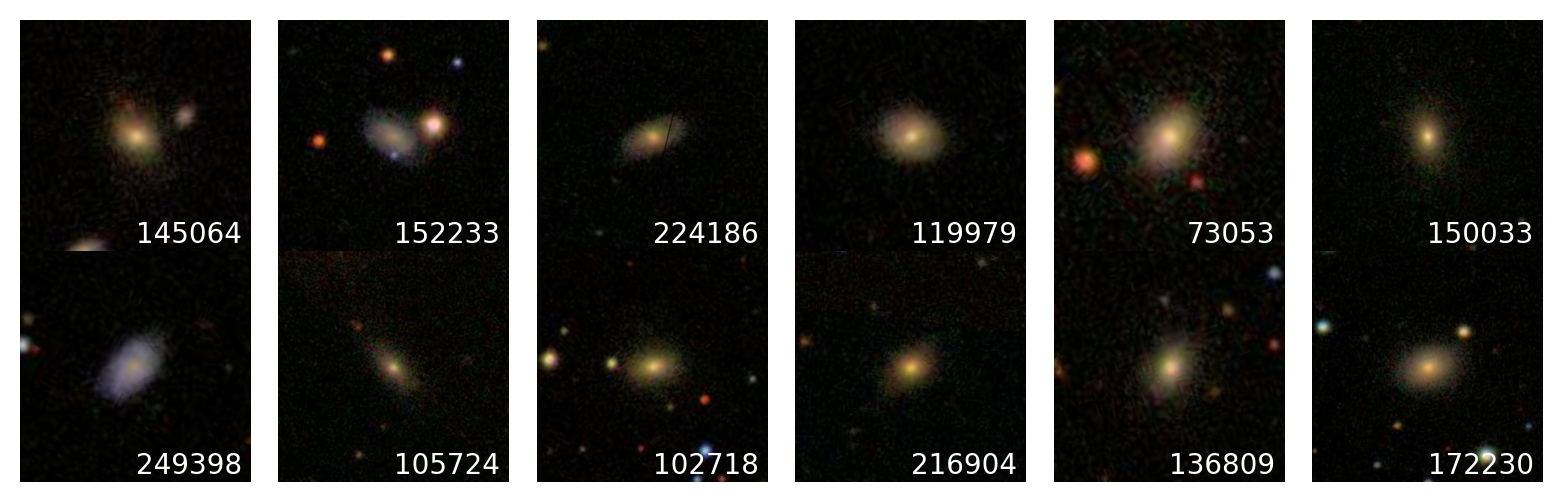

In [45]:
plot_samples(df_class1) # smooth in-between elliptical

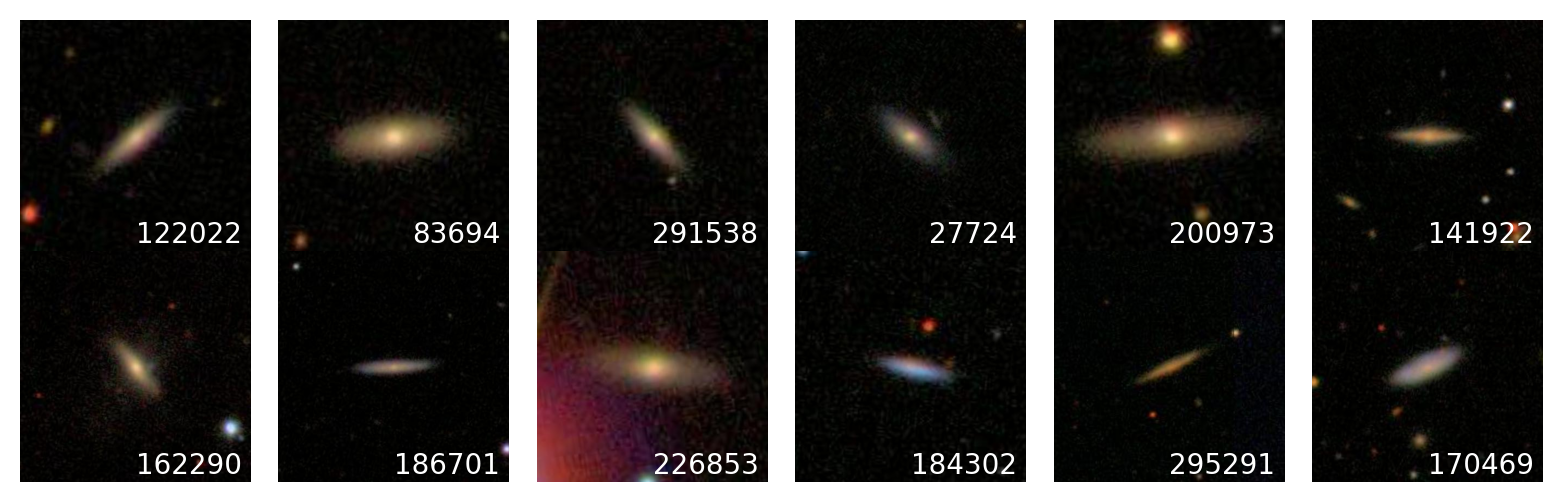

In [46]:
plot_samples(df_class2) # smooth cigar-shaped elliptical

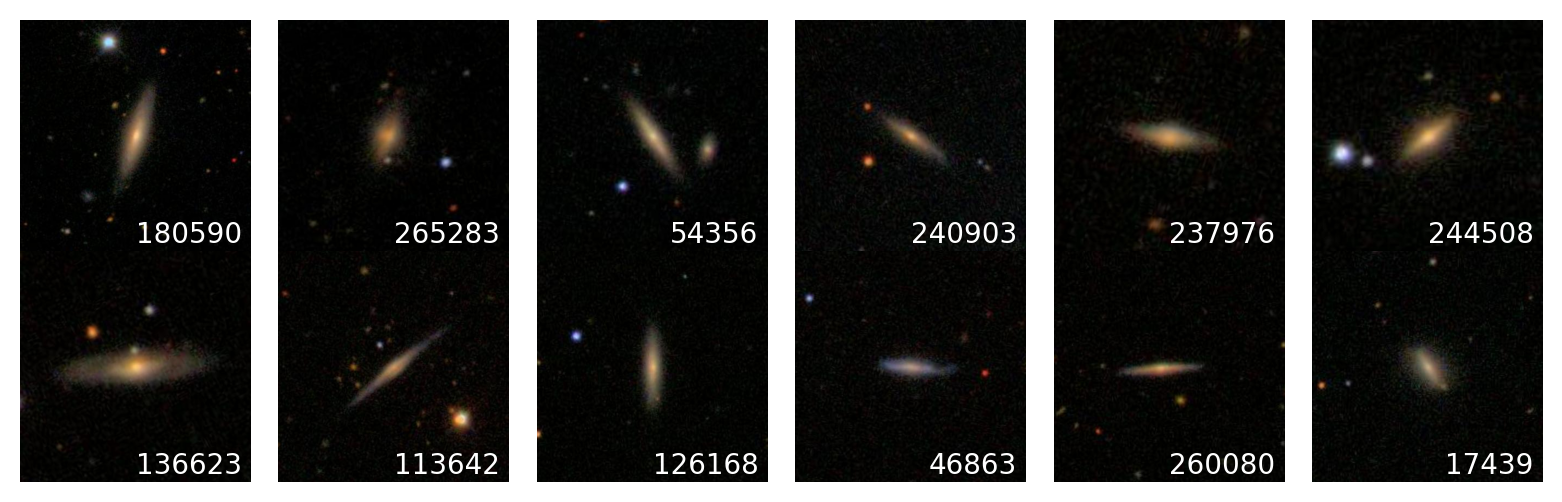

In [47]:
plot_samples(df_class3) # edge-on spiral

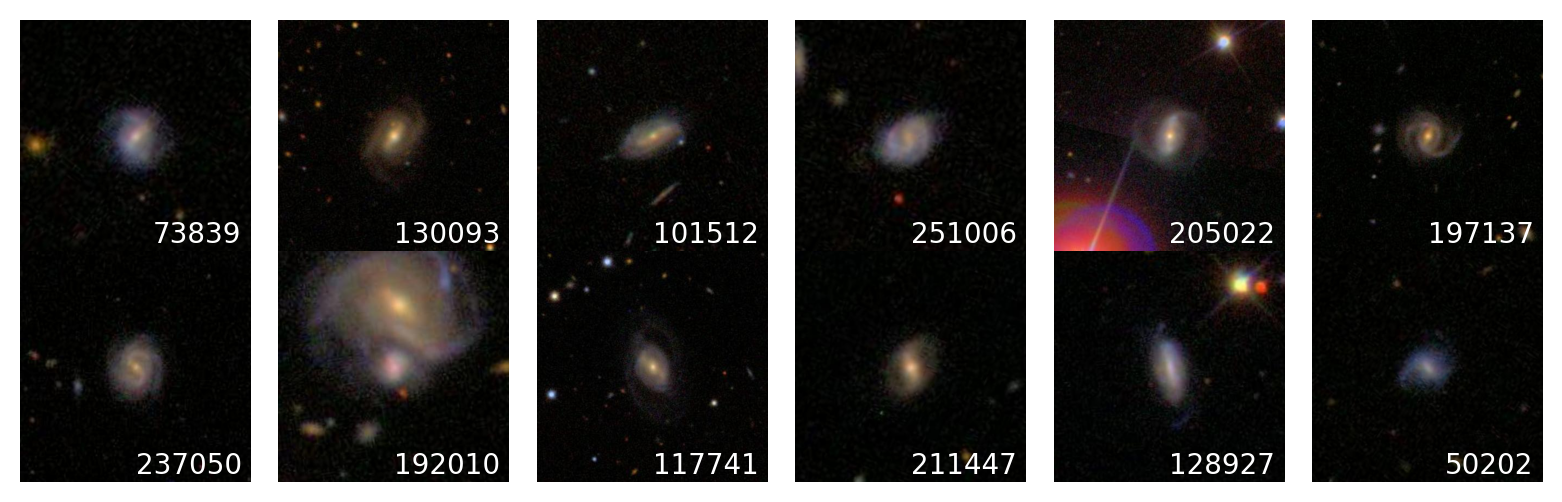

In [48]:
plot_samples(df_class4) # barred spiral

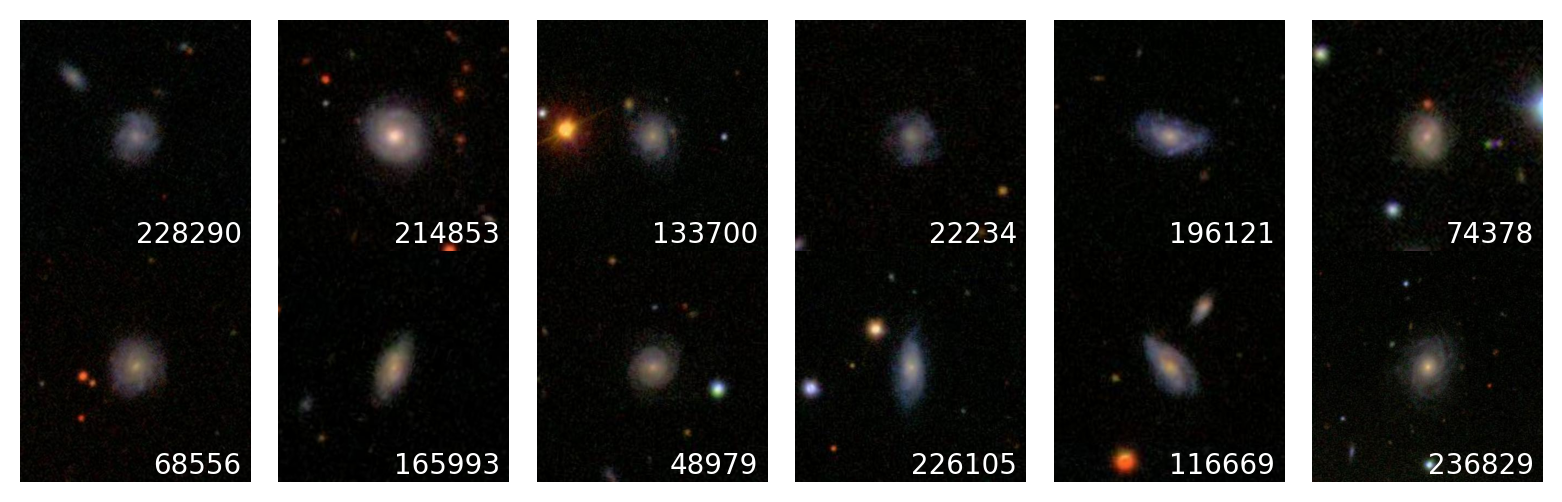

In [49]:
plot_samples(df_class5) # unbarred spiral

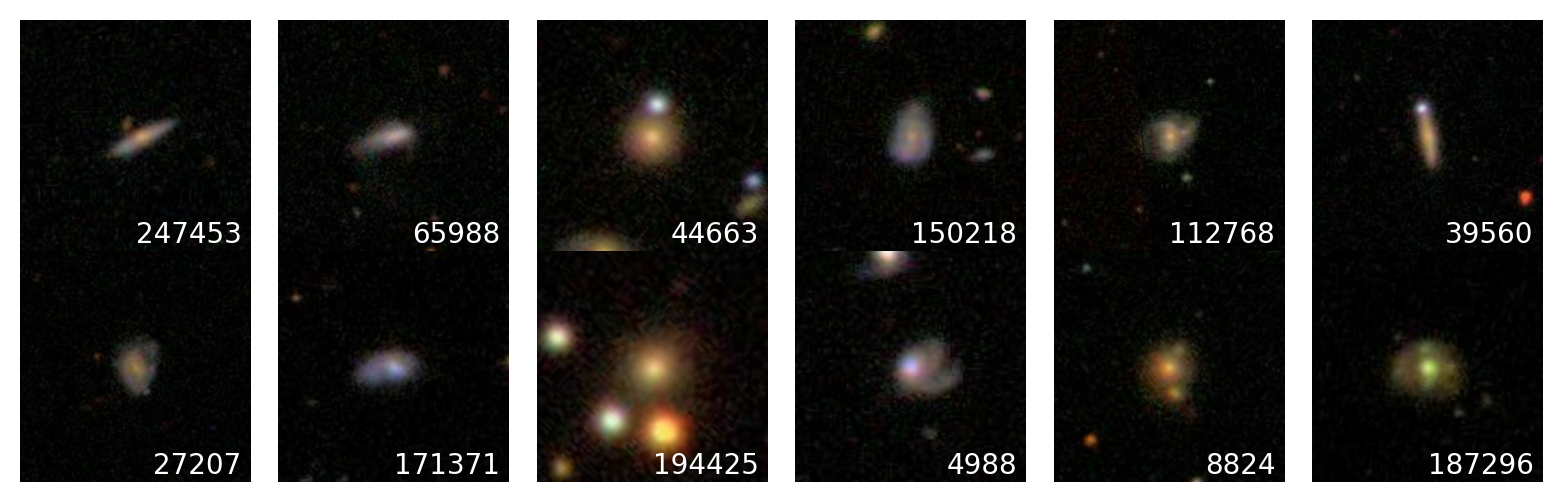

In [50]:
plot_samples(df_class6) # irregular

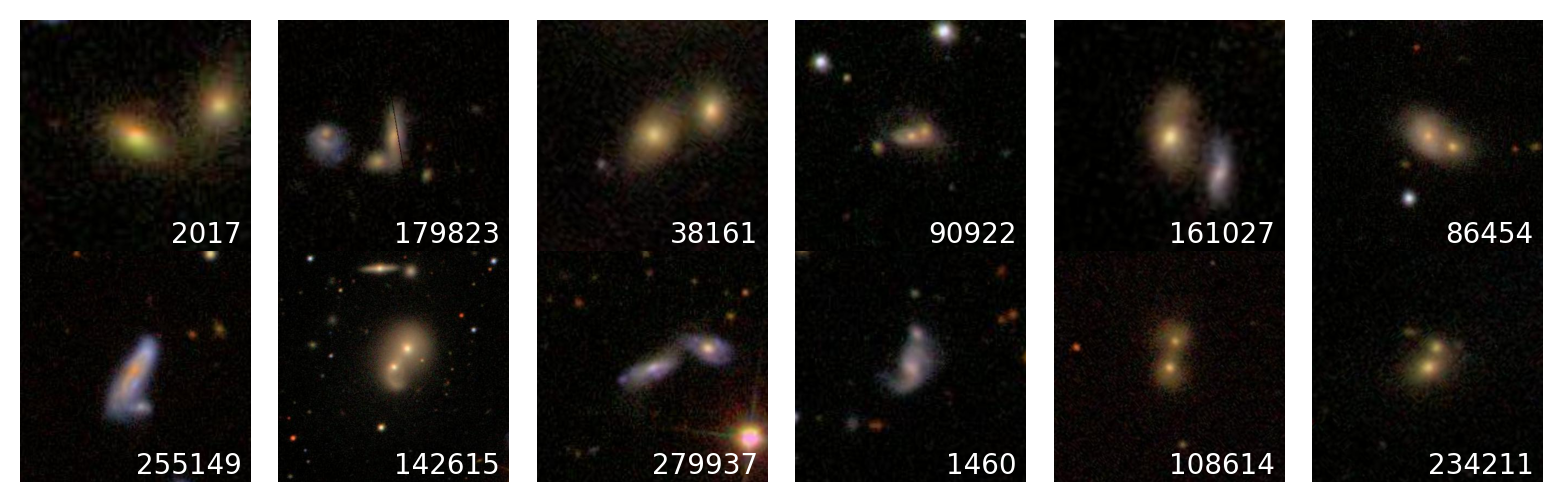

In [51]:
plot_samples(df_class7) # merger

### __---------End--------__

(np.float64(-0.5), np.float64(423.5), np.float64(423.5), np.float64(-0.5))

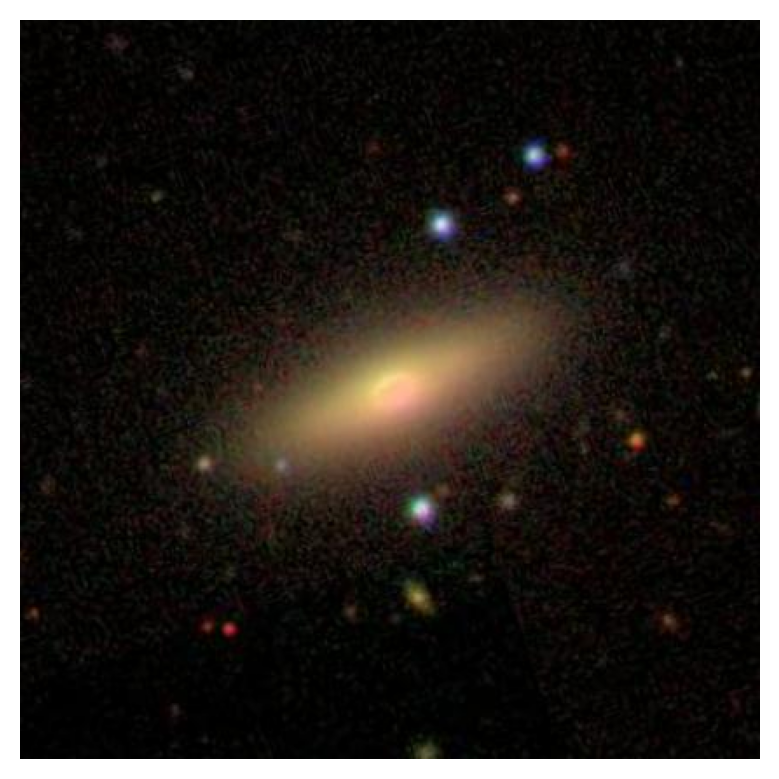

In [52]:
galaxyID = 172941
current_IMG = plt.imread(dir_image+f'/{galaxyID}.jpg')
plt.imshow(current_IMG)
plt.axis('off')